Text(0, 0.5, 'Summe der harmonischen Reihe H(n)')

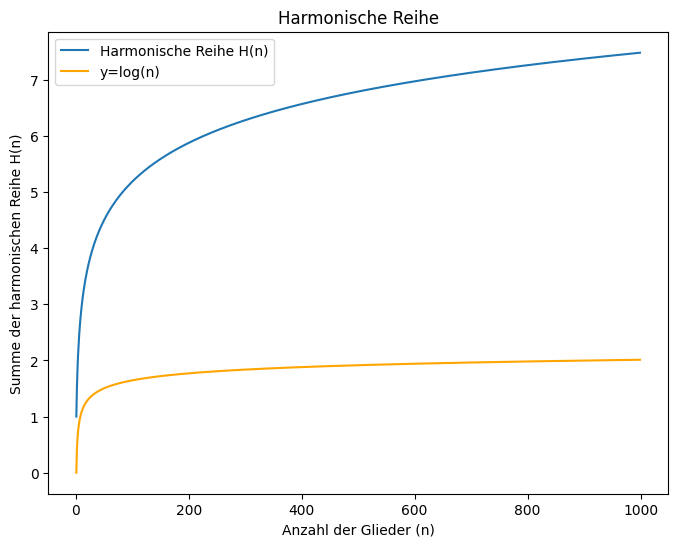

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

anzahl_glieder_1 = np.arange(1, 1000)
#print(anzahl_glieder)

harmonische_folge = 1/anzahl_glieder_1
harmonische_reihe = np.cumsum(harmonische_folge)

#plt.plot(anzahl_glieder, harmonische_folge, 'o-', label='Harmonische Folge')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x=anzahl_glieder_1, y=harmonische_reihe, ax=ax, label='Harmonische Reihe H(n)')
sns.lineplot(x=anzahl_glieder_1, y=np.log(harmonische_reihe), ax=ax, color='orange', label='y=log(n)')
#sns.lineplot(x=anzahl_glieder_1, y=harmonische_folge_1, ax=ax, color='orange', label='Harmonische Folge')
ax.set_title('Harmonische Reihe')
ax.set_xlabel('Anzahl der Glieder (n)')
ax.set_ylabel('Summe der harmonischen Reihe H(n)')



Epsilon: 0.1
Ab n=11 sind alle Folgenglieder innerhalb von Epsilon.


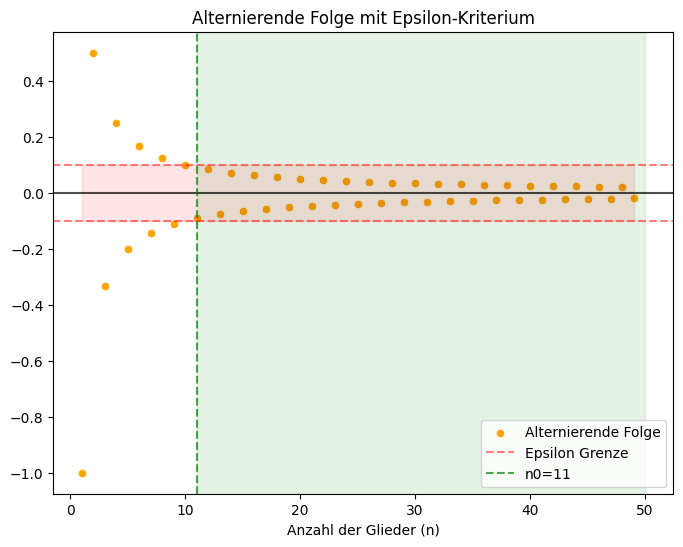

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:   
    epsilon = float(input("Enter epsilon value: "))
    if epsilon <= 0:
        print("Epsilon muss eine positive Zahl sein.")
except ValueError:
    print("Ungültige Eingabe. Bitte eine Zahl eingeben.")
    exit()
    
print(f"Epsilon: {epsilon}")

min_n = int(np.ceil(1/epsilon))
max_n = max(50, min_n + 20)

n_werte = np.arange(1, max_n)

#print(n_werte)

folge = (-1)**n_werte * (1 / n_werte)

#print(folge)

# Epsilon Kriterium
grenzwert = 0

ausserhalb = np.where(np.abs(folge - grenzwert) >= epsilon)[0]
# print(ausserhalb)

if len(ausserhalb) == 0:
    n0 = 1
    print(n0)
elif len(ausserhalb) == len(folge):
    print("Nicht genug Glieder um Epsilon Kriterium zu prüfen.")
else:
    letzter_index_ausserhalb = ausserhalb[-1]
    n0 = (letzter_index_ausserhalb + 1) + 1
    print(f"Ab n={n0} sind alle Folgenglieder innerhalb von Epsilon.")


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(x=n_werte, y=folge, ax=ax, color='orange', label='Alternierende Folge')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.7)
ax.axhline(y=epsilon, color='red', linestyle='--', label='Epsilon Grenze', alpha=0.5)
ax.axhline(y=-epsilon, color='red', linestyle='--', alpha=0.5)
ax.fill_between(n_werte, -epsilon, epsilon, color='red', alpha=0.1)
if n0 <= max_n:
    ax.axvline(x=n0, color='green', linestyle='--', label=f'n0={n0}', alpha=0.7)
    ax.axvspan(n0, max_n, color='green', alpha=0.1)
ax.set_title('Alternierende Folge mit Epsilon-Kriterium')
ax.set_xlabel('Anzahl der Glieder (n)')
ax.legend(loc='lower right')

plt.show()